In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [11]:
##PC:
path = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Yearly point extraction data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  ## more options can be specified also
#     print(df)

# df = df[df['Species_Code'] == 'A1'] ##eventually, you will want to do this

ntimes = 16 # number of times you repeat each item
yourlist = [2000,2001,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
df['Year'] = [i for i in yourlist for _ in range(ntimes)]

df

# print(df.iloc[100,])

# for col in df.columns:
#     print(col)

,B1,B2,B3,B4,B5,B6,B7,system:index,site_id,B10,B11,Year
0,0.0310,0.0466,0.0445,0.1370,0.0632,0.2933,0.0331,0,Assateague,NaN,NaN,2000
1,0.0413,0.0568,0.0450,0.0431,0.0173,0.2929,0.0085,1,Bellvue,NaN,NaN,2000
2,0.0321,0.0662,0.0636,0.2729,0.1777,0.2942,0.0779,2,Box_Tree,NaN,NaN,2000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Channel_Point,NaN,NaN,2000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Cushmans,NaN,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.0202,0.0249,0.0438,0.0336,0.2108,0.1042,0.0466,11,N_Brownsville,0.2966,0.2939,2017
268,0.0239,0.0289,0.0440,0.0375,0.1725,0.1126,0.0549,12,Oyster,0.2965,0.2938,2017
269,0.0374,0.0445,0.0553,0.0525,0.0877,0.0682,0.0405,13,Steelmans,0.2972,0.2941,2017
270,0.0315,0.0355,0.0467,0.0386,0.1012,0.0683,0.0360,14,Wallops,0.2961,0.2934,2017


In [12]:
##Bands and indices

df['Sensor'] = np.where(df['Year']<2013, 'Landsat 5', 'Landsat 8') ##make sure no other sensors are being used

df['ndvi'] = np.where(df['Sensor'] == 'Landsat 5', (df['B4']-df['B3'])/(df['B4']+df['B3']), \
                      (df['B5']-df['B4'])/(df['B5']+df['B4'])) ##ndvi conditional based on whether sensor is Landsat-5 or 8

df['Blue_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B1'], df['B2'])
df['Green_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B2'], df['B3'])
df['Red_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B3'], df['B4'])
df['NIR_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B4'], df['B5'])
df['SWIR1_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B5'], df['B6'])
df['SWIR2_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B7'], df['B7'])

##IMPORTANT: again, these bands between landsat 5 and 8 may not be able to be compared directly

##Variables from Byrd et al. 2018 (make sure calculations are accurate):
df['savi'] = ((df['NIR_band']-df['Red_band'])*1.5)/(df['NIR_band']+df['Red_band']+0.5)
df['wdrvi5'] = (0.5*df['NIR_band']-df['Red_band'])/(0.5*df['NIR_band']+df['Red_band'])
df['nd_r_g'] = (df['Red_band']-df['Green_band'])/(df['Red_band']+df['Green_band'])
df['nd_g_b'] = (df['Green_band']-df['Blue_band'])/(df['Green_band']+df['Blue_band'])
df['nd_swir2_nir'] = (df['SWIR2_band']-df['NIR_band'])/(df['SWIR2_band']+df['NIR_band'])
df['nd_swir2_r'] = (df['SWIR2_band']-df['Red_band'])/(df['SWIR2_band']+df['Red_band'])

df

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df)

,B1,B2,B3,B4,B5,B6,B7,system:index,site_id,B10,...,Red_band,NIR_band,SWIR1_band,SWIR2_band,savi,wdrvi5,nd_r_g,nd_g_b,nd_swir2_nir,nd_swir2_r
0,0.0310,0.0466,0.0445,0.1370,0.0632,0.2933,0.0331,0,Assateague,NaN,...,0.0445,0.1370,0.0632,0.0331,0.203595,0.212389,-0.023052,0.201031,-0.610817,-0.146907
1,0.0413,0.0568,0.0450,0.0431,0.0173,0.2929,0.0085,1,Bellvue,NaN,...,0.0450,0.0431,0.0173,0.0085,-0.004846,-0.352367,-0.115914,0.158002,-0.670543,-0.682243
2,0.0321,0.0662,0.0636,0.2729,0.1777,0.2942,0.0779,2,Box_Tree,NaN,...,0.0636,0.2729,0.1777,0.0779,0.375314,0.364159,-0.020031,0.346897,-0.555872,0.101060
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Channel_Point,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Cushmans,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.0202,0.0249,0.0438,0.0336,0.2108,0.1042,0.0466,11,N_Brownsville,0.2966,...,0.0336,0.2108,0.1042,0.0466,0.357066,0.516547,-0.131783,0.275109,-0.637918,0.162095
268,0.0239,0.0289,0.0440,0.0375,0.1725,0.1126,0.0549,12,Oyster,0.2965,...,0.0375,0.1725,0.1126,0.0549,0.285211,0.393939,-0.079755,0.207133,-0.517150,0.188312
269,0.0374,0.0445,0.0553,0.0525,0.0877,0.0682,0.0405,13,Steelmans,0.2972,...,0.0525,0.0877,0.0682,0.0405,0.082474,-0.089777,-0.025974,0.108216,-0.368175,-0.129032
270,0.0315,0.0355,0.0467,0.0386,0.1012,0.0683,0.0360,14,Wallops,0.2961,...,0.0386,0.1012,0.0683,0.0360,0.146765,0.134529,-0.094959,0.136253,-0.475219,-0.034853


In [13]:
df = df[df['ndvi'].notna()] ##seem to be a lot of missing values!
df['siteName'] = df['site_id'].copy()
display(df)

for col in df.columns:
    print(col)

C:\Users\arj26323\AppData\Local\Temp/ipykernel_18260/724340676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['siteName'] = df['site_id'].copy()


,B1,B2,B3,B4,B5,B6,B7,system:index,site_id,B10,...,NIR_band,SWIR1_band,SWIR2_band,savi,wdrvi5,nd_r_g,nd_g_b,nd_swir2_nir,nd_swir2_r,siteName
0,0.0310,0.0466,0.0445,0.1370,0.0632,0.2933,0.0331,0,Assateague,NaN,...,0.1370,0.0632,0.0331,0.203595,0.212389,-0.023052,0.201031,-0.610817,-0.146907,Assateague
1,0.0413,0.0568,0.0450,0.0431,0.0173,0.2929,0.0085,1,Bellvue,NaN,...,0.0431,0.0173,0.0085,-0.004846,-0.352367,-0.115914,0.158002,-0.670543,-0.682243,Bellvue
2,0.0321,0.0662,0.0636,0.2729,0.1777,0.2942,0.0779,2,Box_Tree,NaN,...,0.2729,0.1777,0.0779,0.375314,0.364159,-0.020031,0.346897,-0.555872,0.101060,Box_Tree
5,0.0341,0.0424,0.0411,0.0744,0.0402,0.2920,0.0248,5,Gator,NaN,...,0.0744,0.0402,0.0248,0.081154,-0.049808,-0.015569,0.108497,-0.500000,-0.247344,Gator
6,0.0461,0.0615,0.0487,0.0656,0.0259,0.2929,0.0167,6,Greens_Creek,NaN,...,0.0656,0.0259,0.0167,0.041266,-0.195092,-0.116152,0.143123,-0.594168,-0.489297,Greens_Creek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.0202,0.0249,0.0438,0.0336,0.2108,0.1042,0.0466,11,N_Brownsville,0.2966,...,0.2108,0.1042,0.0466,0.357066,0.516547,-0.131783,0.275109,-0.637918,0.162095,N_Brownsville
268,0.0239,0.0289,0.0440,0.0375,0.1725,0.1126,0.0549,12,Oyster,0.2965,...,0.1725,0.1126,0.0549,0.285211,0.393939,-0.079755,0.207133,-0.517150,0.188312,Oyster
269,0.0374,0.0445,0.0553,0.0525,0.0877,0.0682,0.0405,13,Steelmans,0.2972,...,0.0877,0.0682,0.0405,0.082474,-0.089777,-0.025974,0.108216,-0.368175,-0.129032,Steelmans
270,0.0315,0.0355,0.0467,0.0386,0.1012,0.0683,0.0360,14,Wallops,0.2961,...,0.1012,0.0683,0.0360,0.146765,0.134529,-0.094959,0.136253,-0.475219,-0.034853,Wallops


B1
B2
B3
B4
B5
B6
B7
system:index
site_id
B10
B11
Year
Sensor
ndvi
Blue_band
Green_band
Red_band
NIR_band
SWIR1_band
SWIR2_band
savi
wdrvi5
nd_r_g
nd_g_b
nd_swir2_nir
nd_swir2_r
siteName


In [26]:
##Average plot value (grouped, more or less, by lat/long, for each year)

va_means = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Average biomass/va_meanmass.csv')
display(va_means)

df_first = pd.merge(df, va_means)
df_first ##n is boiled down to 92 here - at first glance it looks correct, but make sure it is!


,siteName,liveMass,n,std,Longitude,lon_std,Latitude,Year,Species
0,Bellvue,642.700000,16,738.508125,-75.671577,0.000000,37.625273,1999,Spartina alterniflora
1,Box_Tree,87.280000,8,122.078337,-75.876094,0.000000,37.395746,1999,Spartina alterniflora
2,Channel_Point,774.821053,19,658.653461,-75.652248,0.000000,37.709249,1999,Spartina alterniflora
3,Cushmans,210.492632,19,208.344292,-75.942331,0.000000,37.175055,1999,Spartina alterniflora
4,Gator,100.404211,19,146.896115,-75.940586,0.000000,37.167409,1999,Spartina alterniflora
...,...,...,...,...,...,...,...,...,...
144,Gator,164.826667,12,122.050635,-75.940586,0.000000,37.167409,2017,Spartina alterniflora
145,Hog,187.850667,30,154.908315,-75.688106,0.012652,37.425058,2017,Spartina alterniflora
146,Oyster,274.773333,12,187.060452,-75.929133,0.000000,37.287549,2017,Spartina alterniflora
147,Box_Tree,255.040000,1,NaN,-75.876094,NaN,37.395746,2018,Spartina alterniflora


,B1,B2,B3,B4,B5,B6,B7,system:index,site_id,B10,...,nd_swir2_nir,nd_swir2_r,siteName,liveMass,n,std,Longitude,lon_std,Latitude,Species
0,0.0310,0.0466,0.0445,0.1370,0.0632,0.2933,0.0331,0,Assateague,NaN,...,-0.610817,-0.146907,Assateague,177.600000,11,105.157862,-75.372740,0.000000,37.903114,Spartina alterniflora
1,0.0413,0.0568,0.0450,0.0431,0.0173,0.2929,0.0085,1,Bellvue,NaN,...,-0.670543,-0.682243,Bellvue,336.100000,16,365.277568,-75.671577,0.000000,37.625273,Spartina alterniflora
2,0.0321,0.0662,0.0636,0.2729,0.1777,0.2942,0.0779,2,Box_Tree,NaN,...,-0.555872,0.101060,Box_Tree,610.933333,6,399.641973,-75.876094,0.000000,37.395746,Spartina alterniflora
3,0.0341,0.0424,0.0411,0.0744,0.0402,0.2920,0.0248,5,Gator,NaN,...,-0.500000,-0.247344,Gator,284.300000,16,188.006213,-75.940586,0.000000,37.167409,Spartina alterniflora
4,0.0461,0.0615,0.0487,0.0656,0.0259,0.2929,0.0167,6,Greens_Creek,NaN,...,-0.594168,-0.489297,Greens_Creek,369.476923,13,255.850341,-75.814954,0.000000,37.485033,Spartina alterniflora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0370,0.0422,0.0706,0.0613,0.2732,0.1937,0.0922,2,Box_Tree,0.2983,...,-0.495348,0.201303,Box_Tree,242.240000,7,35.539814,-75.876094,0.000000,37.395746,Spartina alterniflora
88,0.0413,0.0462,0.0547,0.0532,0.1205,0.1060,0.0621,4,Cushmans,0.2975,...,-0.319825,0.077190,Cushmans,187.235556,19,102.014549,-75.942331,0.000000,37.175055,Spartina alterniflora
89,0.0279,0.0326,0.0424,0.0394,0.0995,0.0718,0.0382,5,Gator,0.2977,...,-0.445171,-0.015464,Gator,164.826667,12,122.050635,-75.940586,0.000000,37.167409,Spartina alterniflora
90,0.0377,0.0389,0.0481,0.0444,0.1623,0.1220,0.0610,7,Hog,0.2970,...,-0.453650,0.157495,Hog,187.850667,30,154.908315,-75.688106,0.012652,37.425058,Spartina alterniflora


In [27]:
##Daymet data; yearly average
path2 = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Daymet/VA/Yearly averages' 
all_files2 = glob.glob(path2 + "/*.csv")

li = []

for filename in all_files2:
    dm = pd.read_csv(filename, index_col=None, header=0)
    li.append(dm)

dm = pd.concat(li, axis=0, ignore_index=True)

dm.rename(columns={'site_id':'siteName'}, inplace=True)

# dm['ident'] = dm['Latitude']/dm['Longitude']

display(dm)

,dayl,prcp,srad,swe,tmax,tmin,vp,system:index,siteName,Year
0,43225.66406,2.777994,312.268921,0.000000,19.341593,10.093737,1352.812744,0,Assateague,1999
1,43225.39063,2.996428,312.975433,0.000000,19.843296,10.358517,1403.121704,1,Bellvue,1999
2,43225.17188,3.546236,311.112579,0.000000,20.336401,10.515385,1439.916382,2,Box_Tree,1999
3,43225.50000,3.019423,312.720215,0.000000,19.750523,10.242417,1395.202881,3,Channel_Point,1999
4,43224.95703,4.138846,307.906830,0.000000,20.727087,10.791182,1471.754028,4,Cushmans,1999
...,...,...,...,...,...,...,...,...,...,...
315,43225.22656,3.602802,302.137787,1.276209,20.198517,10.934340,1543.677856,11,N_Brownsville,2018
316,43225.06250,3.174231,304.275726,0.612280,20.360769,11.175494,1560.603516,12,Oyster,2018
317,43224.95703,3.326758,303.120178,0.886236,20.540413,11.406786,1585.750732,13,Steelmans,2018
318,43225.66406,3.634506,304.326813,0.565659,19.569973,10.612308,1519.654419,14,Wallops,2018


In [36]:
##Merging elevation point data with band dataset prior to model development

elev_10m = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Point elevation/VA_DEM_vals_10m.csv')

elev_10m.rename(columns={'first':'Elevation'}, inplace=True)
elev_10m.rename(columns={'site_id':'siteName'}, inplace=True)

elev_10m

df0 = pd.merge(df_first, elev_10m)
df1 = pd.merge(df0, dm)

display(df1)

out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'va_df1.csv')
# df1.to_csv(out_csv, index = False)

,B1,B2,B3,B4,B5,B6,B7,system:index,site_id,B10,...,Latitude,Species,Elevation,dayl,prcp,srad,swe,tmax,tmin,vp
0,0.0310,0.0466,0.0445,0.1370,0.0632,0.2933,0.0331,0,Assateague,NaN,...,37.903114,Spartina alterniflora,0.516942,43200.10938,2.858192,310.386261,0.000000,18.359015,9.158137,1329.563721
1,0.0311,0.0543,0.0414,0.2062,0.1072,0.2986,0.0581,0,Assateague,NaN,...,37.903114,Spartina alterniflora,0.516942,43225.66406,2.050522,317.173309,0.000000,19.164038,9.533434,1344.922729
2,0.0413,0.0568,0.0450,0.0431,0.0173,0.2929,0.0085,1,Bellvue,NaN,...,37.625273,Spartina alterniflora,-0.119425,43200.10938,2.930301,314.467102,0.270740,18.999424,9.514164,1360.968018
3,0.0321,0.0662,0.0636,0.2729,0.1777,0.2942,0.0779,2,Box_Tree,NaN,...,37.395746,Spartina alterniflora,0.107919,43200.10938,3.258657,316.690948,0.367562,19.519781,9.687370,1379.829834
4,0.0349,0.0738,0.0694,0.2940,0.1967,0.2986,0.0828,2,Box_Tree,NaN,...,37.395746,Spartina alterniflora,0.107919,43225.17188,2.512912,316.780426,0.000000,20.028955,10.256813,1412.565918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0532,0.0697,0.0731,0.1887,0.2318,0.2994,0.1283,11,N_Brownsville,NaN,...,37.468043,Spartina alterniflora,1.034915,43225.22656,2.652720,317.546905,0.000000,20.071978,10.639917,1469.800293
88,0.0461,0.0688,0.0698,0.2359,0.2200,0.2990,0.1088,11,N_Brownsville,NaN,...,37.468043,Spartina alterniflora,1.034915,43225.22656,3.918159,302.312927,0.000000,19.204807,10.557253,1459.927246
89,0.0583,0.0650,0.0623,0.2119,0.2058,0.2973,0.0990,11,N_Brownsville,NaN,...,37.468043,Spartina alterniflora,1.034915,43225.22656,2.801017,312.438080,0.540165,19.641483,10.664945,1483.516724
90,0.0377,0.0556,0.0542,0.2257,0.1826,0.2964,0.0737,11,N_Brownsville,NaN,...,37.468043,Spartina alterniflora,1.034915,43225.22656,2.758736,313.937012,0.000000,20.372116,11.170687,1494.422729


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor ##try KNN next!
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

xargs=df1[['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi', 'Elevation', \
           'prcp', 'dayl', 'tmax', 'tmin', 'srad', 'vp']]

yargs=df1['liveMass'] 

size_x = 0.2
seed = 0
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=100, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
y_pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred)))
r_square = metrics.r2_score(yargs_test, y_pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, y_pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

Mean Absolute Error: 147.53844471243335
Mean Squared Error: 39445.795725639735
Root Mean Squared Error: 198.60965667771478
The r squared is: -0.30660038054153804
-0.30660038054153804
testing r2 is: -0.30660038054153804
training r2 is: 0.8650303241700822
NRMSE is: 0.2536660639597138
MEAN BASELINE:
Mean Absolute Error: 153.98463299042024
Root Mean Squared Error: 191.78658110499208


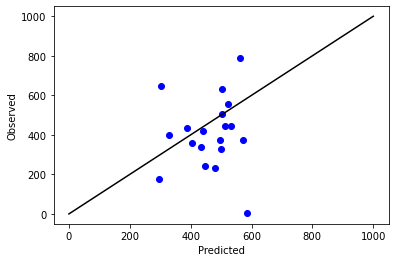

test data correlation coefficient is: 0.03922197823696971
train data correlation coefficient is: 0.9700809787826337


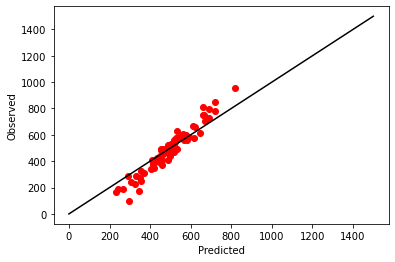

In [34]:
plt.scatter(y_pred, yargs_test, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 1000], [0, 1000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, y_pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 1500], [0, 1500], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

In [35]:
##k-fold cross validation; similar to original random forest regression code

predictors = df1[['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi']]
targets = df1['liveMass'] 

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston

X, y = predictors, targets
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

##from: https://stackoverflow.com/questions/55270431/how-to-correctly-perform-cross-validation-in-scikit-learn

{'fit_time': array([0.08879209, 0.08482051, 0.08612585, 0.08577061, 0.08936667]),
 'score_time': array([0.00598454, 0.00701976, 0.00700521, 0.00698471, 0.0069828 ]),
 'test_r2': array([ 0.0534741 , -1.28823812, -0.54616262,  0.29552416, -0.59346459]),
 'test_neg_root_mean_squared_error': array([-218.73530061, -162.8414399 , -237.24351515, -116.59025053,
        -203.67358508])}